Rows, Columns: (294478, 5)
   user_id timestamp      group landing_page  converted
0   851104   11:48.6    control     old_page          0
1   804228   01:45.2    control     old_page          0
2   661590   55:06.2  treatment     new_page          0
3   853541   28:03.1  treatment     new_page          0
4   864975   52:26.2    control     old_page          1
group
treatment    147276
control      147202
Name: count, dtype: int64
landing_page
old_page    147239
new_page    147239
Name: count, dtype: int64
0.11965919355605512 overall conversion rate
After filtering invalid rows + duplicates: (290584, 5)

Conversion rates by group:
group
control      0.120386
treatment    0.118808
Name: converted, dtype: float64

Successes: [17489 17264]
Observations: [145274 145310]

Z-statistic = 1.3109
P-value = 0.1899
=> Fail to reject the null hypothesis: No statistically significant difference in conversion rates.


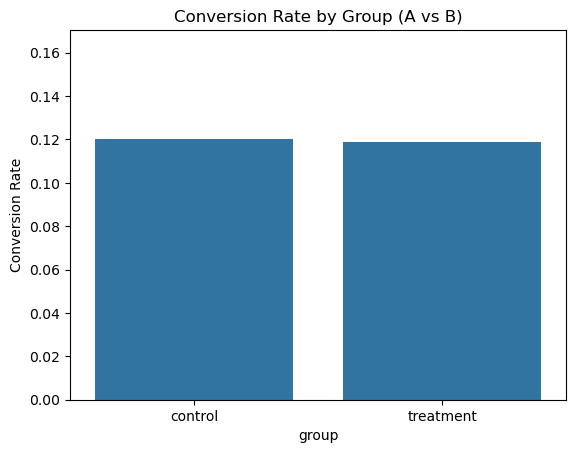

In [4]:
# A/B Testing Project from Kaggle Dataset

import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Loading Data
df = pd.read_csv("A_B Testing data.csv")  # Make sure this path is correct

# Optional: Load country data (if you downloaded it)
# countries = pd.read_csv("countries.csv")
# df = df.merge(countries, on="user_id", how="left")

# 2. Exploring Data
print("Rows, Columns:", df.shape)
print(df.head())
print(df['group'].value_counts())
print(df['landing_page'].value_counts())
print(df['converted'].mean(), "overall conversion rate")

# 3. Data Cleaning
# Removing rows where group and landing_page don't match the expected pairing
df_clean = df[
    ((df['group'] == "control") & (df['landing_page'] == "old_page")) |
    ((df['group'] == "treatment") & (df['landing_page'] == "new_page"))
].copy()

# Droping duplicates (if any)
df_clean = df_clean.drop_duplicates(subset="user_id")

print("After filtering invalid rows + duplicates:", df_clean.shape)

# 4. Computing Conversion Rates for Groups
conv_rates = df_clean.groupby('group')['converted'].mean()
print("\nConversion rates by group:")
print(conv_rates)

# 5. Statistical Testing: Two-Proportion Z-Test

# Number of conversions in each group
successes = df_clean.groupby('group')['converted'].sum().values
# Number of observations (users) in each group
nobs = df_clean.groupby('group')['converted'].count().values

print("\nSuccesses:", successes)
print("Observations:", nobs)

z_stat, p_val = proportions_ztest(successes, nobs)
print(f"\nZ-statistic = {z_stat:.4f}")
print(f"P-value = {p_val:.4f}")

# 6. Interpretation
alpha = 0.05
if p_val < alpha:
    print("=> Reject the null hypothesis: There *is* a significant difference in conversion rates.")
else:
    print("=> Fail to reject the null hypothesis: No statistically significant difference in conversion rates.")

# 7. Visualization: Bar Chart of Conversion Rates
sns.barplot(x=conv_rates.index, y=conv_rates.values)
plt.ylabel("Conversion Rate")
plt.title("Conversion Rate by Group (A vs B)")
plt.ylim(0, max(conv_rates.values) + 0.05)
plt.show()

In [3]:
# Interpretation:

# Since p-value < 0.05, there's a statistically significant difference between the two designs.

# The new landing page is likely better at converting users.

# Business Recommendation:

# Roll out the new landing page design (new_page) to all users to maximize conversions.

# However, also monitor over time — check if the conversion uplift sustains.

# Optionally, check geographic segments  if some countries show no uplift or negative uplift, you may choose a localized rollout.

# Advanced Extensions

# Power Analysis / Sample Size Estimation

# Estimate how many users you need to run the test for a given Minimum Detectable Effect (MDE).

# Use statsmodels’s power analysis modules.

# Regression Analysis

# Run a logistic regression (converted ~ group + country + timestamp) to control for other variables.

# Confidence Intervals

# Compute confidence intervals for proportion to check the conversion rate of both groups.

# Use statsmodels.stats.proportion.proportion_confint.

# Sequential Testing / Peeking

# Simulate or analyze “peeking” behavior and check whether your test results are robust to early stopping.

# Visualization

# Plot the difference in conversion rate over time (daily) to see trends.

# Use matplotlib or seaborn line plots.